In [1]:
from src import Pipeline, Plotter
from src.utils.read import load_data
import numpy as np
import pandas as pd

In [2]:
X, ids = load_data('spleen')
pipe = Pipeline(X, config="configs/config.ini", col_ids=ids)
plotter = Plotter(pipe)
pipe.run(clu_method='Leiden')

INFO:PCA: Initializing PCA.
INFO:PCA: Knee found at 15.
INFO:Leiden: Initializing Leiden Clustering.
INFO:TTest: Using 200 markers.
INFO:TTest: Finished finding markers for cluster=0.
INFO:TTest: Finished finding markers for cluster=1.
INFO:TTest: Finished finding markers for cluster=2.
INFO:TTest: Finished finding markers for cluster=3.
INFO:TTest: Finished finding markers for cluster=4.
INFO:TTest: Finished finding markers for cluster=5.
INFO:TTest: Finished finding markers for cluster=6.
INFO:TTest: Finished finding markers for cluster=7.
INFO:TTest: Finished finding markers for cluster=8.
INFO:TTest: Finished finding markers for cluster=9.
INFO:TTest: Finished finding markers for cluster=10.
INFO:TTest: Finished finding markers for cluster=11.
INFO:TTest: Finished finding markers for cluster=12.
INFO:TTest: Finished finding markers for cluster=13.
INFO:HyperGeom: Finished finding lvl1 types.
INFO:HyperGeom: Finished finding lvl2 types.


INFO:UMAP: Initializing UMAP.


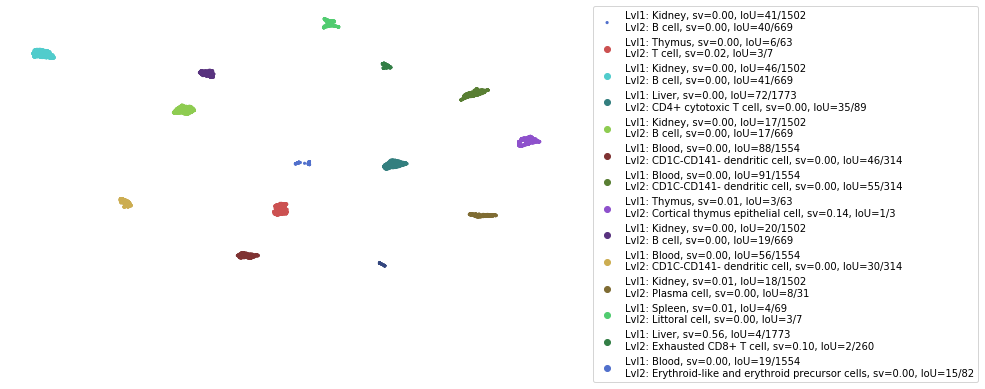

In [3]:
plotter.plot_clu(path="images/spleen/leiden.png")